<a href="https://colab.research.google.com/github/325021079/tutorial-2-325021079/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/yotam-biu/tutorial9/main/penguins.csv -O /content/penguins.csv
!wget https://raw.githubusercontent.com/yotam-biu/python_utils/main/lab_setup_do_not_edit.py -O /content/lab_setup_do_not_edit.py
import lab_setup_do_not_edit



## 1. **Load the dataset:**  

   After running the first cell of this notebook, the file `penguins.csv` will appear in the `Files` folder.
   You need to loaded the file as a DataFrame.  




In [2]:
import pandas as pd
peng_data = pd.read_csv('penguins.csv')
peng_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Chinstrap,Dream,49.8,17.3,198.0,3675.0,Female
1,Adelie,Biscoe,42.0,19.5,200.0,4050.0,Male
2,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
3,Gentoo,Biscoe,45.7,13.9,214.0,4400.0,Female
4,Adelie,Torgersen,41.8,19.4,198.0,4450.0,Male


## 2. **Select features:**  

   - Choose **two features** as inputs for the model.  
   - Choose the feature `sex` as the output (target) of the model.  

  #### Advice:  
  - You can consider creating pair plots or using other EDA methods we learned in the last lecture to explore the relationships between features and determine which ones are most relevant.  


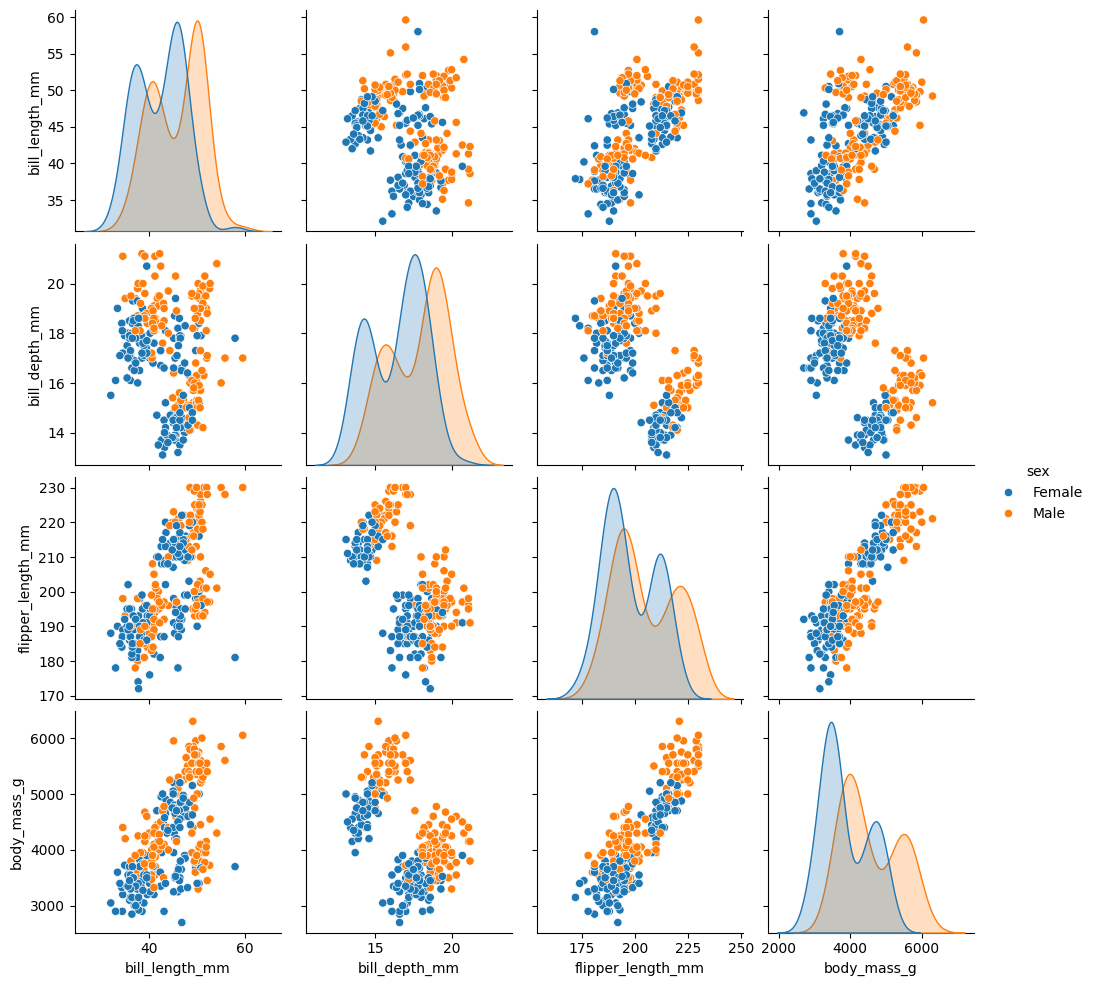

In [3]:
import seaborn as sns
peng_data.dropna()
sns.pairplot(peng_data, hue='sex')


## 3. **Scale the data:**

   Apply the `MinMaxScaler` to scale the two input columns to a range between 0 and 1.  


In [8]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Drop rows with any NaN values in the selected columns for cleaner processing
peng_data_cleaned = peng_data[['body_mass_g', 'bill_depth_mm', 'sex']].dropna()

# Define features (X) and target (y)
X = peng_data_cleaned[['body_mass_g', 'bill_depth_mm']]
y = peng_data_cleaned['sex']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Original features head:")
display(X.head())
print("\nScaled features head:")
display(X_scaled_df.head())
print("\nTarget head:")
display(y.head())

Original features head:


,body_mass_g,bill_depth_mm
0,3675.0,17.3
1,4050.0,19.5
2,3600.0,19.0
3,4400.0,13.9
4,4450.0,19.4



Scaled features head:


,body_mass_g,bill_depth_mm
0,0.270833,0.518519
1,0.375000,0.790123
2,0.250000,0.728395
3,0.472222,0.098765
4,0.486111,0.777778



Target head:


,sex
0,Female
1,Male
2,Female
3,Female
4,Male


## 4. **Split the data:**

   Divide the dataset into a training set and a validation set.





In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train: (212, 2)
Shape of X_val: (53, 2)
Shape of y_train: (212,)
Shape of y_val: (53,)


## 5. **Choose a model:**  

   Select a model to train on the data.  



In [17]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)











KNeighborsClassifier(n_neighbors=9)

# 6. **Test the accuracy:**  

   Evaluate the model's accuracy on the test set. Ensure that the accuracy is at least **0.85**.  


In [18]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8490566037735849


## 7. **Save and upload the model:**  

   After you are happy with your results, save the model with the `.joblib` extension and upload it to your GitHub repository main folder.
   
   Additionally, update the `config.yaml` file with the list of selected features and the model's joblib file name.  


example:  
```yaml
selected_features: ["A", "B"]  
path: "my_model.joblib"  
```

In [19]:
import joblib

joblib.dump(model, 'my_model.joblib')

['my_model.joblib']

In [21]:
# model = joblib.load('my_model.joblib')

## 8. **Advanced Assignment**  
   After completing the previous assignment and receiving a green "✔" in the  GitHub repository, you may want to improve your model by:  
   - Adding more than two features.  
   - Trying a different model.  
   - Adjusting the model's parameters.  
   - Using categorical features as input (apply `OneHotEncoder` for encoding).  
   - Using a numerical value as the output instead of a categorical one.  
